# 09.01 모형 결합 (Ensemble methods)

    - 복수의 예측방법을 결합해 성능 개선을 하려는 방법론
    
    - 회귀분석과 달리, Classification에서는 여러 모형의 결합이 가능
    - Regression은 일종의 '주관식'과 같기에, 여러명이 동시에 문제푼 답이 서로 같기 힘들다.
    - Classification은 일종의 '객관식' 문제와 같기에, 여러 명이 동시에 시험문제를 풀면 같은 답을 낸 모델들을 확인할 수 있고, 
      이를 통해 답을 비교해볼 수 있다.
      
    - 장점
        1) 단일 모형 시 보다, 성능 분산이 감소
            ex) K-fold 검증 시, 테스트 성능이 K회차 진행 시, 성능의 편차가 심하지 않음
            
        2) 개별 모형이 성능이 안좋을 경우, 결합모형의 성능이 더 향상됨
            * 결합되는 모형이 서로 독립적이어야, 결합시 성능향상 효과 가능
        
        
    - 분류
        1) 취합 방법론(aggregation methods) : Majority Voting, Bagging, Random Forest
            * 사용할 모형의 집합이 미리 정해져있음, 같은 과정을 반복
        
        2) 부스팅 방법론(boosting methods) : AdaBoost, Gradient Boost
            * 사용할 모형을 점진적으로 늘려감


# 1. Majority Voting (다수결 방법)

    - 가장 단순한 모형 결합
    
    - 독립적, 0.5 이상의 성능을 보이는 모형의 다수결 결합 -> 성능 향상
    
    - 전혀 다른 모형들의 결합 가능
    - Voting 방식에 따라 -> Hard / Soft 모델로 나뉨
        Hard voting : 단순 투표 (개별 모형의 결과 중 가장 많은 결과 채택)
        Soft voting : 가중치 투표 (개별 모형의 조건부 확률 합 기준)

### IRIS 데이터 연습

    - 모형 결합 갯수 제한 없이
    - K=5 인 Cross Validation
    - test 성능 확인(모형 결합 갯수에 따른)
    

In [7]:
# 데이터 로드

from sklearn.datasets import load_iris

data = load_iris()
dir(data)
y = data.target
X = data.data

In [29]:
# 분류 모형 결합(확률적 생성 -> QDA, 나이브베이즈(정규분포), 확률적 판별 -> 로지스틱회귀)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier(max_depth=5, random_state=0)
ensemble1 = VotingClassifier(estimators = [('lr',model1)],voting='soft')
ensemble2 = VotingClassifier(estimators = [('lr',model1),('qda',model2)],voting='soft')                             
ensemble3 = VotingClassifier(estimators = [('lr',model1),('qda',model2),('gnb',model3)],voting='soft')
ensemble4 = VotingClassifier(estimators = [('lr',model1),('qda',model2),('gnb',model3),('dt',model4)],voting='soft')
                             
# 결합 모형으로 학습
ensemble1.fit(X,y)
ensemble2.fit(X,y)
ensemble3.fit(X,y)
ensemble4.fit(X,y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=1, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('qda',
                              QuadraticDiscriminantAnalysis(priors=None,
                                                            reg_param=0.0,
                                                            store_covariance=Fa...
                          

In [30]:
# 결합 모형 예측 결과 저장
y_pred1 = ensemble1.predict(X)
y_pred2 = ensemble2.predict(X)
y_pred3 = ensemble3.predict(X)
y_pred4 = ensemble3.predict(X)

[0.94, 0.97, 0.96, 0.96]


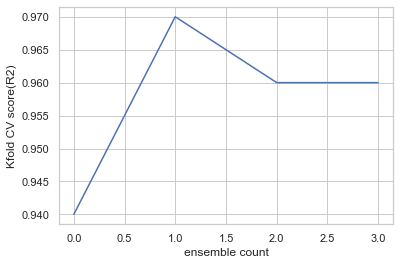

In [41]:
# KFOLD 검증

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

result = []
result.append(round(cross_val_score(ensemble1, X, y, scoring='r2', cv=5).mean(),2))
result.append(round(cross_val_score(ensemble2, X, y, scoring='r2', cv=5).mean(),2))
result.append(round(cross_val_score(ensemble3, X, y, scoring='r2', cv=5).mean(),2))
result.append(round(cross_val_score(ensemble3, X, y, scoring='r2', cv=5).mean(),2))
plt.xlabel("ensemble count")
plt.ylabel("Kfold CV score(R2)")
plt.plot(result)
print(result)

# 2. Bagging (배깅)

    - 다수결 모형의 한계 : 조합할 수 있는 모델의 수가 한정 (파라미터 튜닝도 한계가 있음)
    
    - 다수결 모형 + 부트스트래핑(데이터 및 독립변수 중복 or 선택)

### Breast_Cancer 데이터 연습

    - 배깅 방식 (모형의 종류, 갯수, 방법은 자유)
    - K=5 인 Cross Validation
    - test 성능 확인(모형 결합 갯수에 따른)
    

In [44]:
# 데이터 로드

from sklearn.datasets import load_breast_cancer
data_cc = load_breast_cancer()
X_cc = data_cc.data
y_cc = data_cc.target

In [66]:
X_cc.shape

(569, 30)

In [77]:
# 배깅 모델 생성

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

model1_cc = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_cc, y_cc)
model2_cc = LogisticRegression(random_state=0).fit(X_cc, y_cc)
model3_cc = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X_cc, y_cc)
model4_cc = BaggingClassifier(LogisticRegression(), n_estimators=100, random_state=0).fit(X_cc, y_cc)
model5_cc = BaggingClassifier(LogisticRegression(), n_estimators=100, random_state=0, bootstrap=False).fit(X_cc, y_cc)
model6_cc = BaggingClassifier(LogisticRegression(), n_estimators=100, random_state=0, bootstrap=False, bootstrap_features=True).fit(X_cc, y_cc)
model7_cc = BaggingClassifier(LogisticRegression(), n_estimators=100, random_state=0, bootstrap=False, max_features=0.5).fit(X_cc, y_cc)
model8_cc = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0, bootstrap=False).fit(X_cc, y_cc)


[0.92, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.93]


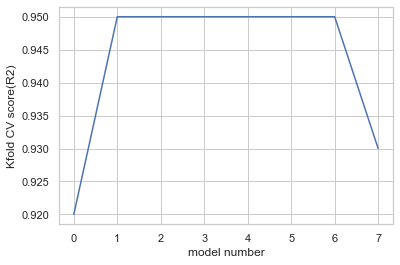

In [78]:
# 배깅 모델 성능 측정 - Kfold 검증( k = 5 )

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

result_cc = []
result_cc.append(round(cross_val_score(model1_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model2_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model3_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model4_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model5_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model6_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model7_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc.append(round(cross_val_score(model8_cc, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))

plt.xlabel("model number")
plt.ylabel("Kfold CV score(R2)")
plt.plot(result_cc)
print(result_cc)

# 3. Random Forest

    - Decision-Tree를 개별모형으로 사용하는 모형결합 
    
    - Bagging 중 subspace 접근법 (Decision-Tree 대상)

### Breast_Cancer 데이터 연습

    - Random Forest 방식
    - K=5 인 Cross Validation
    - test 성능 확인(모형 결합 갯수에 따른)
    

[0.92, 0.97, 0.96]


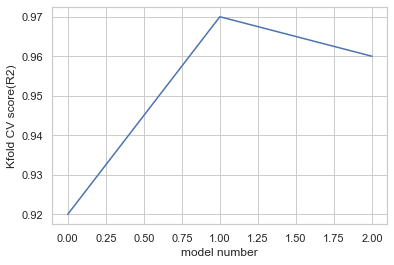

In [81]:
# Random Forest 모델의 성능이 가장 높음

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

model1_cc_ = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X_cc, y_cc)
model2_cc_ = RandomForestClassifier(max_depth=8, n_estimators=100, random_state=0).fit(X_cc, y_cc)
model3_cc_ = ExtraTreesClassifier(max_depth=8, n_estimators=100, random_state=0).fit(X_cc, y_cc)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

result_cc_ = []
result_cc_.append(round(cross_val_score(model1_cc_, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc_.append(round(cross_val_score(model2_cc_, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))
result_cc_.append(round(cross_val_score(model3_cc_, X_cc, y_cc, scoring='accuracy', cv=5).mean(),2))

plt.xlabel("model number")
plt.ylabel("Kfold CV score(R2)")
plt.plot(result_cc_)
print(result_cc_)

In [82]:
model3_cc_.feature_importances_

array([0.05137085, 0.02224677, 0.06317007, 0.07895922, 0.01210732,
       0.0124311 , 0.06063895, 0.06632594, 0.0043762 , 0.00413648,
       0.01995869, 0.00273072, 0.02459884, 0.02379606, 0.00349276,
       0.00435099, 0.0087521 , 0.00869424, 0.00334084, 0.00404549,
       0.09203223, 0.0182322 , 0.09842327, 0.07931864, 0.01279314,
       0.03213589, 0.03768656, 0.13001233, 0.01270762, 0.00713449])